=== EXECUTIVE SUMMARY ===
Total Loans: 32,522
Total Portfolio: $311,702,000
Default Rate: 21.8%
Total Defaults: 7,102
Healthy Loans: 25,420 (78.2%)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17628\734557786.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_defaults = df.groupby('customer_segment')['loan_status'].mean().sort_values(ascending=False)


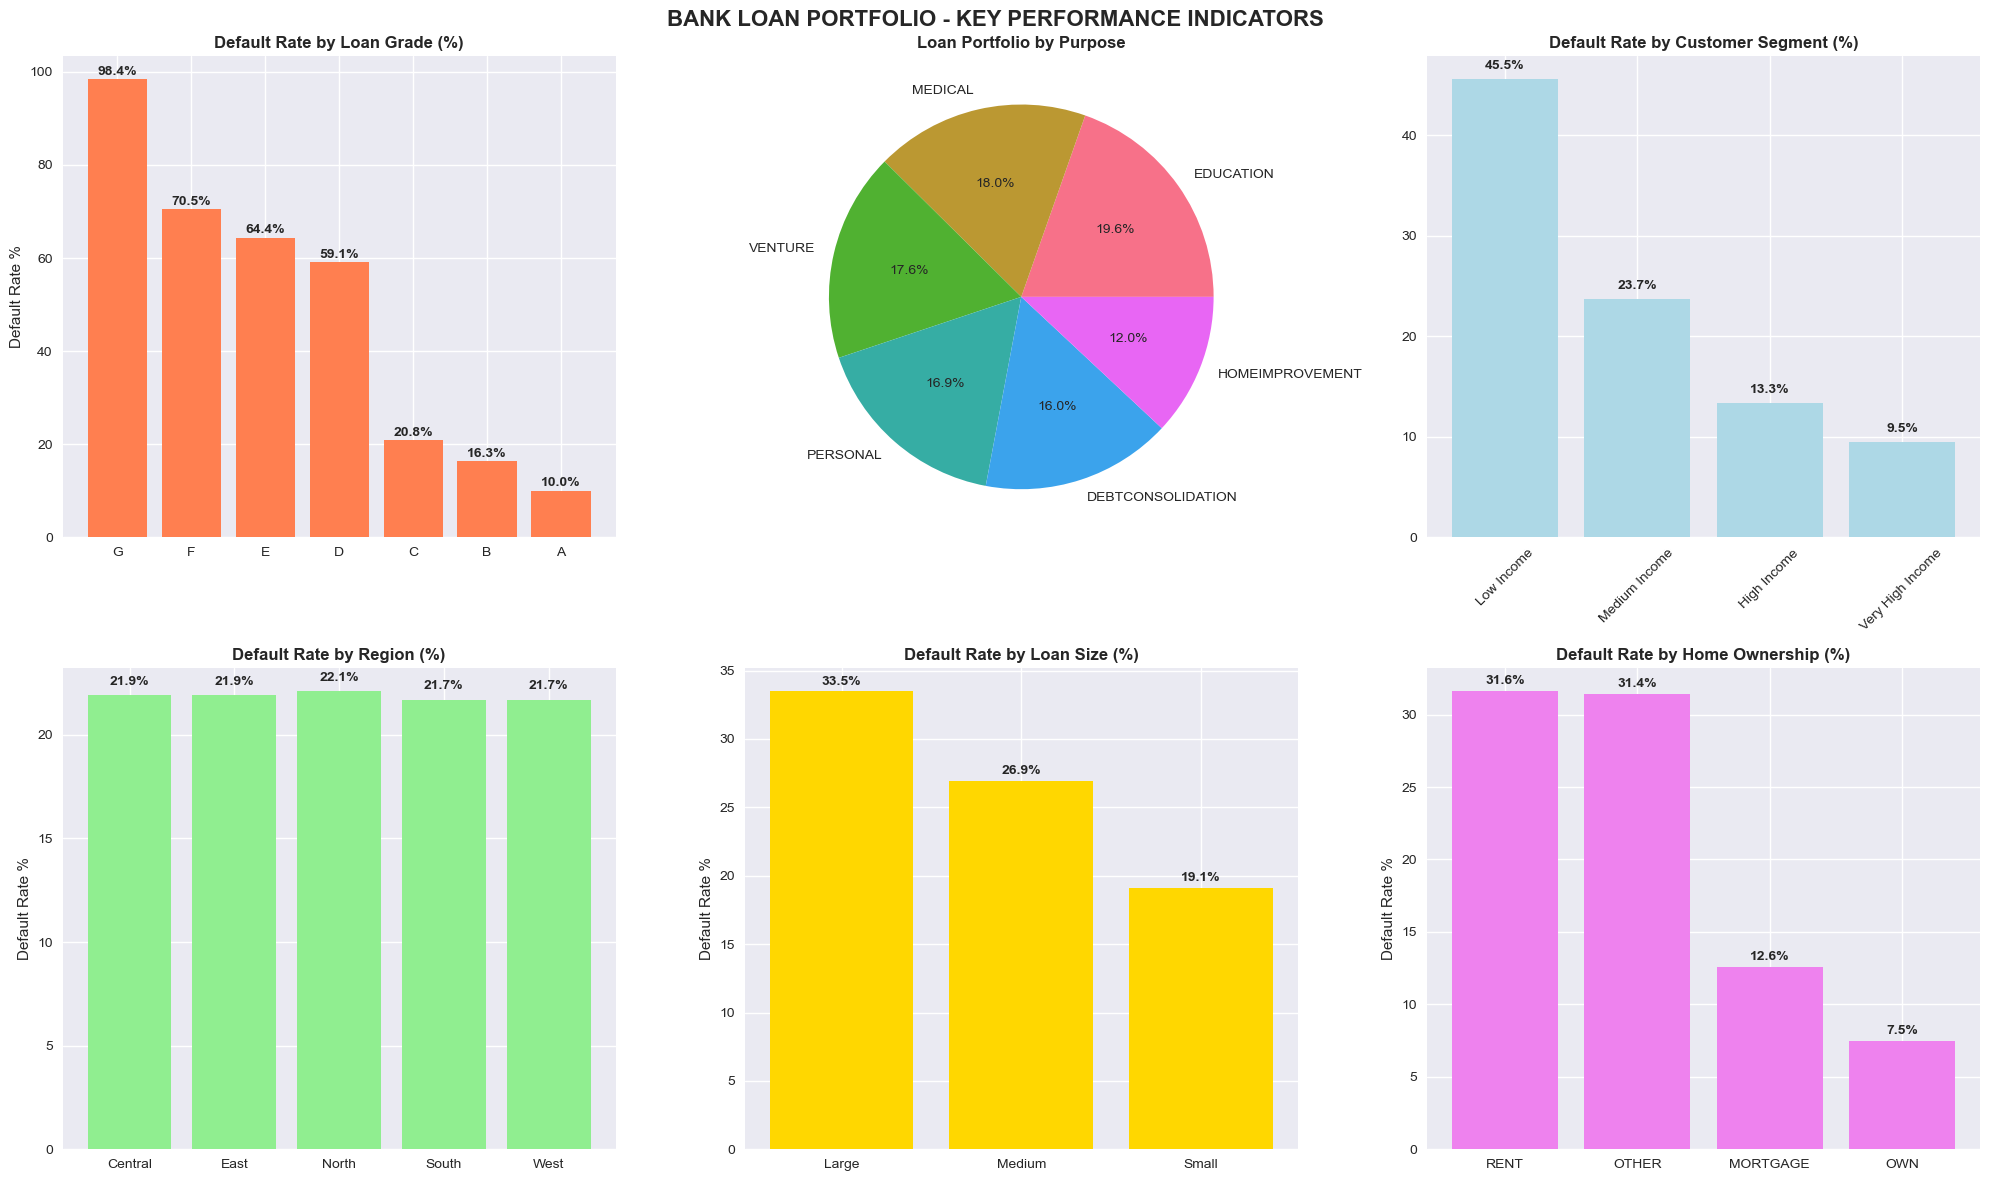

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# set professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv("cleaned_loan_data.csv")
df['customer_segment'] = pd.cut(
    df['person_income'],
    bins=[0, 30000, 60000, 100000, np.inf],
    labels=['Low Income', 'Medium Income', 'High Income', 'Very High Income']
)


# 1. EXECUTIVE SUMMARY METRICS
print("=== EXECUTIVE SUMMARY ===")
total_loans = len(df)
total_portfolio = df['loan_amnt'].sum()
default_rate = df['loan_status'].mean()
total_defaults = df['loan_status'].sum()
default_amount = df[df['loan_status'] == 1]['loan_amnt'].sum()

print(f"Total Loans: {total_loans:,}")
print(f"Total Portfolio: ${total_portfolio:,.0f}")
print(f"Default Rate: {default_rate*100:.1f}%")
print(f"Total Defaults: {total_defaults:,}")
print(f"Healthy Loans: {total_loans - total_defaults:,} ({(1-default_rate)*100:.1f}%)")


# 2. KEY PERFORMANCE INDICATORS (KPIs)

fig, axes = plt.subplots(2,3, figsize=(20,12))
fig.suptitle('BANK LOAN PORTFOLIO - KEY PERFORMANCE INDICATORS', fontsize=16, fontweight='bold')

# KPI 1: Default Rate by Loan Grade
grade_defaults = df.groupby('loan_grade').agg({
    'loan_status': ['count', 'mean', 'sum'],
    'loan_amnt': 'sum'
}).round(3)
grade_defaults.columns = ['total_loans', 'default_rate', 'default_count', 'total_amount']
grade_defaults = grade_defaults.sort_values('default_rate', ascending=False)

axes[0,0].bar(grade_defaults.index, grade_defaults['default_rate']*100,color='coral')
axes[0,0].set_title('Default Rate by Loan Grade (%)',fontweight='bold')
axes[0,0].set_ylabel('Default Rate %')
for i, v in enumerate(grade_defaults['default_rate']*100):
    axes[0,0].text(i, v + 1,f'{v:.1f}%', ha='center',fontweight='bold')


# KPI 2: Portfolio Distribution by Loan Purpose

purpose_portfolio = df.groupby('loan_intent')['loan_amnt'].sum().sort_values(ascending=False)
axes[0,1].pie(purpose_portfolio.values, labels=purpose_portfolio.index, autopct='%1.1f%%')
axes[0,1].set_title('Loan Portfolio by Purpose', fontweight='bold')

#KPI 3: Default Rate by Income Segment
income_defaults = df.groupby('customer_segment')['loan_status'].mean().sort_values(ascending=False)
axes[0,2].bar(income_defaults.index, income_defaults*100, color = 'lightblue')
axes[0,2].set_title('Default Rate by Customer Segment (%)', fontweight='bold')
axes[0,2].tick_params(axis='x',rotation=45)
for i, v in enumerate(income_defaults*100):
    axes[0,2].text(i, v + 1,f'{v:.1f}%', ha='center', fontweight='bold')


# KPI 4: Regional performance
regional_performance = df.groupby('region').agg({
    'loan_amnt': 'sum',
    'loan_status': 'mean',
    'branch_id': 'nunique'
}).round(3)
regional_performance.columns = ['total_portfolio', 'default_rate', 'branch_count']

axes[1,0].bar(regional_performance.index, regional_performance['default_rate']*100,color='lightgreen')
axes[1,0].set_title('Default Rate by Region (%)',fontweight='bold')
axes[1,0].set_ylabel('Default Rate %')
for i,v in enumerate(regional_performance['default_rate']*100):
    axes[1,0].text(i, v + 0.5, f'{v:.1f}%', ha='center' , fontweight='bold')


# KPI 5: Loan Size Risk Analysis
size_risk = df.groupby('loan_size')['loan_status'].mean().sort_index()
axes[1,1].bar(size_risk.index, size_risk*100, color='gold')
axes[1,1].set_title('Default Rate by Loan Size (%)',fontweight='bold')
axes[1,1].set_ylabel('Default Rate %')
for i,v in enumerate(size_risk*100):
    axes[1,1].text(i, v + 0.5, f'{v:.1f}%',ha='center',fontweight ='bold')

# KPI 6: Home Ownership Impact

home_risk = df.groupby('person_home_ownership')['loan_status'].mean().sort_values(ascending=False)
axes[1,2].bar(home_risk.index, home_risk*100, color='violet')
axes[1,2].set_title('Default Rate by Home Ownership (%)', fontweight='bold')
axes[1,2].set_ylabel('Default Rate %')
for i, v in enumerate(home_risk*100):
    axes[1,2].text(i,v + 0.5, f'{v:.1f}%',ha='center',fontweight='bold')

plt.tight_layout()
plt.savefig('business_kpis.png',dpi=300, bbox_inches='tight')
plt.show()



             